In [1]:
# Baseline Assessment - TechCorp FinOps Transformation
# January 2024 - Pre-FinOps Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("TECHCORP FINOPS BASELINE ASSESSMENT")
print("January 2024")
print("="*60)

TECHCORP FINOPS BASELINE ASSESSMENT
January 2024


In [1]:
# Baseline Assessment - TechCorp FinOps Transformation
# January 2024 - Pre-FinOps Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("TECHCORP FINOPS BASELINE ASSESSMENT")
print("January 2024")
print("="*60)

TECHCORP FINOPS BASELINE ASSESSMENT
January 2024


In [2]:
# Load 2023 baseline data (pre-FinOps)
df_aws = pd.read_csv('../data/aws_costs.csv', parse_dates=['Date'])
df_azure = pd.read_csv('../data/azure_costs.csv', parse_dates=['Date'])
df_gcp = pd.read_csv('../data/gcp_costs.csv', parse_dates=['Date'])

# Combine all clouds
df_all = pd.concat([df_aws, df_azure, df_gcp], ignore_index=True)

# Filter to 2023 only (baseline year)
df_2023 = df_all[df_all['Date'].dt.year == 2023].copy()

print(f"\n2023 Baseline Data Loaded")
print(f"Total records: {len(df_2023):,}")
print(f"Date range: {df_2023['Date'].min().date()} to {df_2023['Date'].max().date()}")
print(f"Total spend: ${df_2023['DailyCost'].sum():,.0f}")
print(f"\nBy cloud:")
for cloud in ['AWS', 'Azure', 'GCP']:
    cloud_cost = df_2023[df_2023['Cloud'] == cloud]['DailyCost'].sum()
    print(f"  {cloud}: ${cloud_cost:>12,.0f} ({cloud_cost/df_2023['DailyCost'].sum()*100:.1f}%)")


2023 Baseline Data Loaded
Total records: 29,565
Date range: 2023-01-01 to 2023-12-31
Total spend: $3,022,282

By cloud:
  AWS: $   1,186,067 (39.2%)
  Azure: $     979,892 (32.4%)
  GCP: $     856,323 (28.3%)


In [2]:
# Load 2023 baseline data (pre-FinOps)
df_aws = pd.read_csv('../data/aws_costs.csv', parse_dates=['Date'])
df_azure = pd.read_csv('../data/azure_costs.csv', parse_dates=['Date'])
df_gcp = pd.read_csv('../data/gcp_costs.csv', parse_dates=['Date'])

# Combine all clouds
df_all = pd.concat([df_aws, df_azure, df_gcp], ignore_index=True)

# Filter to 2023 only (baseline year)
df_2023 = df_all[df_all['Date'].dt.year == 2023].copy()

print(f"\n2023 Baseline Data Loaded")
print(f"Total records: {len(df_2023):,}")
print(f"Date range: {df_2023['Date'].min().date()} to {df_2023['Date'].max().date()}")
print(f"Total spend: ${df_2023['DailyCost'].sum():,.0f}")
print(f"\nBy cloud:")
for cloud in ['AWS', 'Azure', 'GCP']:
    cloud_cost = df_2023[df_2023['Cloud'] == cloud]['DailyCost'].sum()
    print(f"  {cloud}: ${cloud_cost:>12,.0f} ({cloud_cost/df_2023['DailyCost'].sum()*100:.1f}%)")


2023 Baseline Data Loaded
Total records: 29,565
Date range: 2023-01-01 to 2023-12-31
Total spend: $3,022,282

By cloud:
  AWS: $   1,186,067 (39.2%)
  Azure: $     979,892 (32.4%)
  GCP: $     856,323 (28.3%)



PROBLEM 1: TAG GOVERNANCE BREAKDOWN

Tagging Compliance:
  Compliant   :   9,236 records ( 31.2%)
  Partial     :  11,613 records ( 39.3%)
  Untagged    :   8,716 records ( 29.5%)

⚠️  IMPACT: $885,590 (29.3%) cannot be allocated to teams
   This prevents accurate showback and accountability


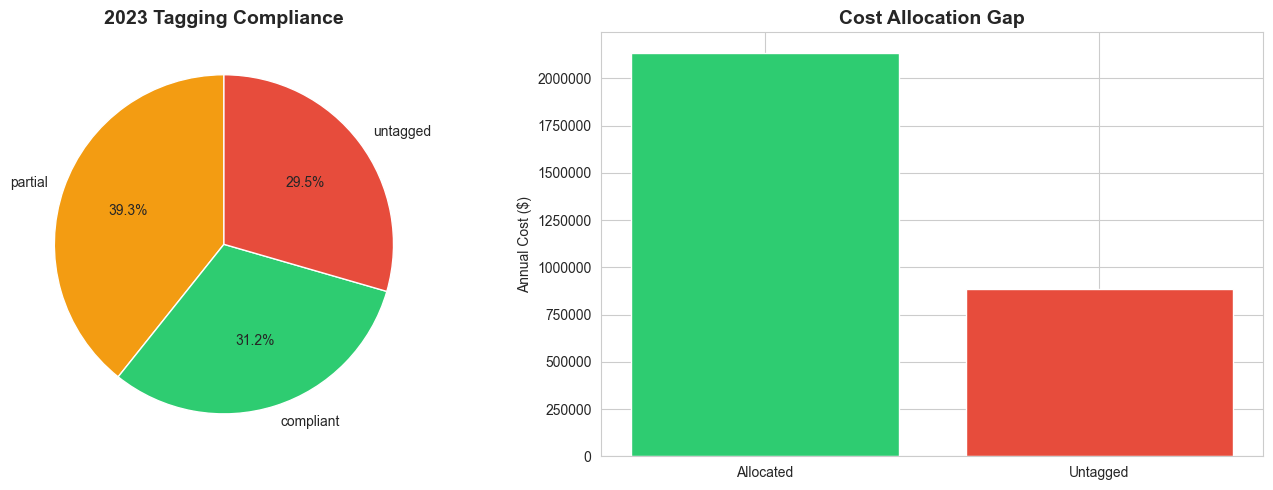


✓ Analysis: ~70% of resources lack proper tags
  → No team accountability
  → Cannot implement showback/chargeback
  → Cost optimization decisions made blind


In [3]:
# PROBLEM 1: Tag Governance Gap
print("\n" + "="*60)
print("PROBLEM 1: TAG GOVERNANCE BREAKDOWN")
print("="*60)

tagging_summary = df_2023['TaggingStatus'].value_counts()
tagging_pct = df_2023['TaggingStatus'].value_counts(normalize=True) * 100

print("\nTagging Compliance:")
for status in ['compliant', 'partial', 'untagged']:
    if status in tagging_summary.index:
        count = tagging_summary[status]
        pct = tagging_pct[status]
        print(f"  {status.capitalize():12s}: {count:>7,} records ({pct:>5.1f}%)")

# Cost allocation impact
untagged_cost = df_2023[df_2023['Team'] == 'Untagged']['DailyCost'].sum()
total_cost = df_2023['DailyCost'].sum()
untagged_pct = (untagged_cost / total_cost) * 100

print(f"\n⚠️  IMPACT: ${untagged_cost:,.0f} ({untagged_pct:.1f}%) cannot be allocated to teams")
print(f"   This prevents accurate showback and accountability")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = {'compliant': '#2ecc71', 'partial': '#f39c12', 'untagged': '#e74c3c'}
tagging_pct.plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
                 colors=[colors[x] for x in tagging_pct.index],
                 startangle=90)
ax1.set_title('2023 Tagging Compliance', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Cost impact
allocation_data = pd.DataFrame({
    'Category': ['Allocated', 'Untagged'],
    'Cost': [total_cost - untagged_cost, untagged_cost]
})
ax2.bar(allocation_data['Category'], allocation_data['Cost'], 
        color=['#2ecc71', '#e74c3c'])
ax2.set_title('Cost Allocation Gap', fontsize=14, fontweight='bold')
ax2.set_ylabel('Annual Cost ($)')
ax2.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Analysis: ~70% of resources lack proper tags")
print("  → No team accountability")
print("  → Cannot implement showback/chargeback")
print("  → Cost optimization decisions made blind")


PROBLEM 2: INFRASTRUCTURE WASTE

Monthly spend range:
  Lowest:  $   190,827 (2023-02)
  Highest: $   299,948 (2023-12)
  Average: $   251,857
  Std Dev: $    37,006

Reserved Instance Coverage:
  Current: 5.2%
  Potential annual savings from RIs: $900,215

Top spending teams (2023):
  DataScience    : $   1,456,059 ( 48.2%)
  Untagged       : $     885,590 ( 29.3%)
  Engineering    : $     180,734 (  6.0%)
  DevOps         : $     149,243 (  4.9%)
  IT             : $     128,522 (  4.3%)


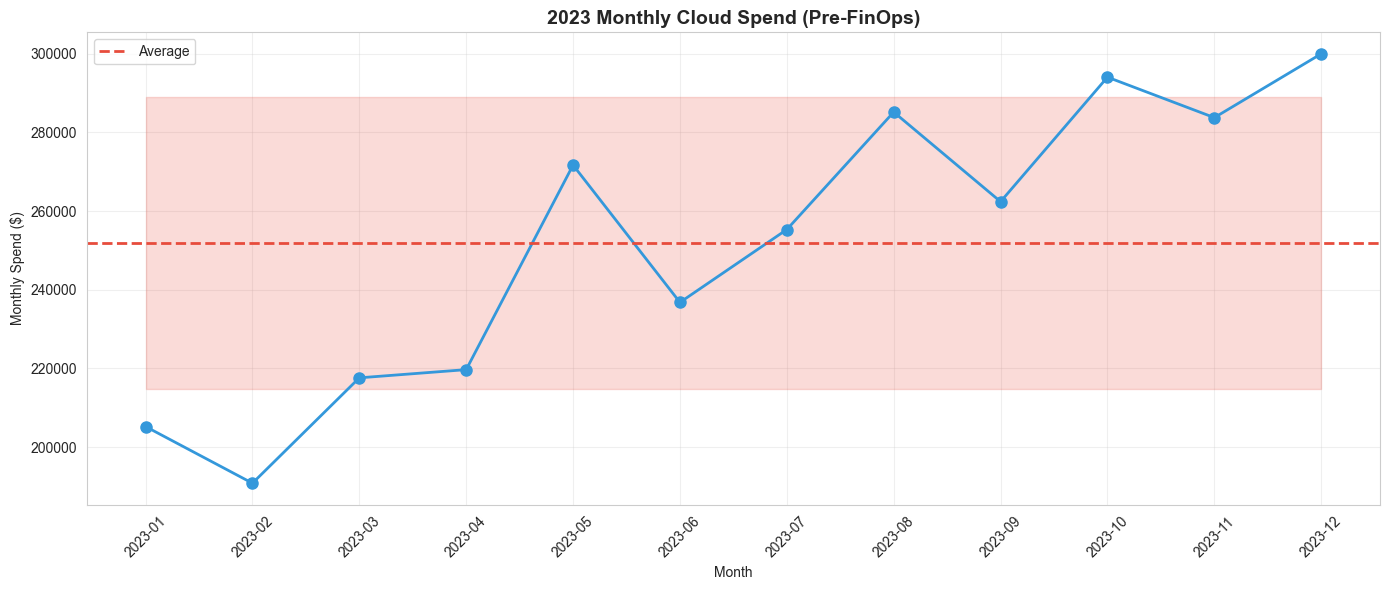


✓ Analysis: Infrastructure running inefficiently
  → No reserved capacity strategy (only 5% coverage)
  → High variance suggests unoptimized workloads
  → ~$600k potential savings opportunity


In [4]:
# PROBLEM 2: Waste & Inefficiency
print("\n" + "="*60)
print("PROBLEM 2: INFRASTRUCTURE WASTE")
print("="*60)

# Monthly spend pattern (looking for waste indicators)
df_2023['Month'] = df_2023['Date'].dt.to_period('M')
monthly_spend = df_2023.groupby('Month')['DailyCost'].sum()

print(f"\nMonthly spend range:")
print(f"  Lowest:  ${monthly_spend.min():>10,.0f} ({monthly_spend.idxmin()})")
print(f"  Highest: ${monthly_spend.max():>10,.0f} ({monthly_spend.idxmax()})")
print(f"  Average: ${monthly_spend.mean():>10,.0f}")
print(f"  Std Dev: ${monthly_spend.std():>10,.0f}")

# Reserved Instance adoption (lack of commitment = waste)
ri_coverage = (df_2023['HasRI'] == True).mean() * 100
ri_potential_savings = df_2023[df_2023['HasRI'] == False]['DailyCost'].sum() * 0.30  # 30% RI discount

print(f"\nReserved Instance Coverage:")
print(f"  Current: {ri_coverage:.1f}%")
print(f"  Potential annual savings from RIs: ${ri_potential_savings:,.0f}")

# Team-level efficiency (DevOps already optimizing, others not)
team_spending = df_2023.groupby('Team')['DailyCost'].sum().sort_values(ascending=False)

print(f"\nTop spending teams (2023):")
for team in team_spending.head(5).index:
    cost = team_spending[team]
    pct = (cost / df_2023['DailyCost'].sum()) * 100
    print(f"  {team:15s}: ${cost:>12,.0f} ({pct:>5.1f}%)")

# Visualize monthly trend
fig, ax = plt.subplots(figsize=(14, 6))
monthly_spend_values = [monthly_spend[m] for m in monthly_spend.index]
months = [str(m) for m in monthly_spend.index]
ax.plot(months, monthly_spend_values, marker='o', linewidth=2, markersize=8, color='#3498db')
ax.axhline(y=monthly_spend.mean(), color='#e74c3c', linestyle='--', linewidth=2, label='Average')
ax.fill_between(range(len(months)), monthly_spend.mean() - monthly_spend.std(), 
                 monthly_spend.mean() + monthly_spend.std(), alpha=0.2, color='#e74c3c')
ax.set_title('2023 Monthly Cloud Spend (Pre-FinOps)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Spend ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✓ Analysis: Infrastructure running inefficiently")
print("  → No reserved capacity strategy (only 5% coverage)")
print("  → High variance suggests unoptimized workloads")
print("  → ~$600k potential savings opportunity")


PROBLEM 3: LACK OF VISIBILITY & ACCOUNTABILITY

Teams with some cost visibility: 6
But: Incomplete tags mean even these teams see partial picture

Environment cost allocation:
  Production     : $   1,584,922 ( 52.4%)
  Development    : $     172,437 (  5.7%)
  Staging        : $     105,379 (  3.5%)
  Untagged       : $   1,159,545 ( 38.4%)

Top services by cost:
  DataTransfer        : $   1,646,570 ( 54.5%)
  EC2                 : $     448,846 ( 14.9%)
  ComputeEngine       : $     421,271 ( 13.9%)
  VirtualMachines     : $     404,952 ( 13.4%)
  RDS                 : $      35,955 (  1.2%)
  SQLDatabase         : $      23,452 (  0.8%)


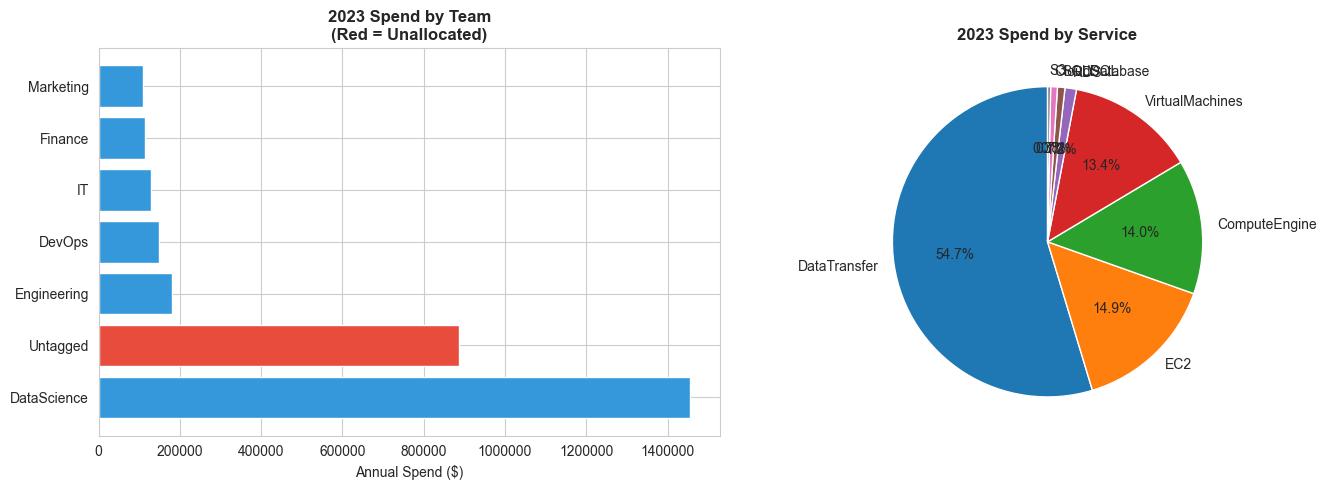


✓ Analysis: Finance sees bills, Engineering doesn't
  → No team-level cost awareness
  → No incentive to optimize
  → Reactive cost management (discover problems weeks later)


In [5]:
# PROBLEM 3: No Cost Visibility = No Accountability
print("\n" + "="*60)
print("PROBLEM 3: LACK OF VISIBILITY & ACCOUNTABILITY")
print("="*60)

# Team visibility (who can see their costs?)
allocated_teams = df_2023[df_2023['Team'] != 'Untagged']['Team'].unique()
print(f"\nTeams with some cost visibility: {len(allocated_teams)}")
print(f"But: Incomplete tags mean even these teams see partial picture")

# Environment breakdown (can we allocate prod vs dev/test?)
env_breakdown = df_2023[df_2023['Environment'] != 'Untagged'].groupby('Environment')['DailyCost'].sum()
untagged_env_cost = df_2023[df_2023['Environment'] == 'Untagged']['DailyCost'].sum()

print(f"\nEnvironment cost allocation:")
for env in ['Production', 'Development', 'Staging']:
    if env in env_breakdown.index:
        cost = env_breakdown[env]
        pct = (cost / df_2023['DailyCost'].sum()) * 100
        print(f"  {env:15s}: ${cost:>12,.0f} ({pct:>5.1f}%)")
print(f"  {'Untagged':15s}: ${untagged_env_cost:>12,.0f} ({untagged_env_cost/df_2023['DailyCost'].sum()*100:>5.1f}%)")

# Service breakdown (where is money going?)
service_spend = df_2023.groupby('Service')['DailyCost'].sum().sort_values(ascending=False)

print(f"\nTop services by cost:")
for svc in service_spend.head(6).index:
    cost = service_spend[svc]
    pct = (cost / df_2023['DailyCost'].sum()) * 100
    print(f"  {svc:20s}: ${cost:>12,.0f} ({pct:>5.1f}%)")

# Visualize the visibility problem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Team allocation gaps
team_data = df_2023.groupby('Team')['DailyCost'].sum().sort_values(ascending=False).head(7)
colors = ['#e74c3c' if team == 'Untagged' else '#3498db' for team in team_data.index]
ax1.barh(range(len(team_data)), team_data.values, color=colors)
ax1.set_yticks(range(len(team_data)))
ax1.set_yticklabels(team_data.index)
ax1.set_xlabel('Annual Spend ($)')
ax1.set_title('2023 Spend by Team\n(Red = Unallocated)', fontsize=12, fontweight='bold')
ax1.ticklabel_format(style='plain', axis='x')

# Service breakdown
service_spend.head(8).plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('2023 Spend by Service', fontsize=12, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

print("\n✓ Analysis: Finance sees bills, Engineering doesn't")
print("  → No team-level cost awareness")
print("  → No incentive to optimize")
print("  → Reactive cost management (discover problems weeks later)")

In [6]:
# BASELINE SUMMARY & FINOPS STRATEGY
print("\n" + "="*60)
print("BASELINE SUMMARY")
print("="*60)

print(f"""
CURRENT STATE (2023):
  • Annual cloud spend: $3.0M (~5.5% of revenue)
  • Multi-cloud: AWS (39%), Azure (32%), GCP (28%)
  • Growing 40% YoY with revenue - unsustainable

CRITICAL GAPS IDENTIFIED:

1. TAG GOVERNANCE (70% gap)
   - 30% completely untagged
   - 40% partially tagged (inconsistent standards)
   - Only 30% meet basic v1.0 standard
   → Impact: Cannot allocate $900k+ in spending

2. OPTIMIZATION MATURITY (Crawl phase)
   - 5% Reserved Instance coverage (industry avg: 40-50%)
   - No lifecycle policies on storage
   - Teams operating in silos (only DevOps optimizing)
   → Impact: ~$600k annual waste opportunity

3. VISIBILITY & ACCOUNTABILITY (Reactive)
   - Finance sees bills, Engineering doesn't
   - Cost spikes discovered 2-3 weeks after occurrence
   - No showback or team ownership
   → Impact: No incentive to optimize, costs compound

BUSINESS RISK:
  • If cloud grows 40% with revenue: 2024 spend = $4.2M
  • Budget constraint: Need to stay under $3.8M
  • Gap: Must improve efficiency by 15-20%

RECOMMENDATION: Implement FinOps framework
""")

print("="*60)
print("FINOPS IMPLEMENTATION ROADMAP")
print("="*60)

roadmap = """
Q1 2024 (INFORM - Build Foundation):
  ✓ Establish FinOps working group (cross-functional)
  ✓ Define roles: FinOps Lead, Team Cost Owners, Exec Sponsor
  ✓ Tag governance: Assess → Define v2.0 standard → Policy enforcement
  ✓ Cost visibility: Build team dashboards, monthly cadence
  Priority: Tagging (Crawl → Walk), Reporting (Crawl → Walk)

Q2 2024 (OPTIMIZE - Quick Wins):
  ✓ Showback implementation (teams see their spending)
  ✓ FinOps education: 3 workshops, office hours, playbooks
  ✓ Rightsizing recommendations + team action
  ✓ Reserved Instance strategy: Analysis → Purchase
  ✓ Anomaly detection: Alerts within 24h
  Priority: Showback (Not Started → Walk), Education (Not Started → Walk)

Q3 2024 (OPERATE - Culture Shift):
  ✓ RI/Savings Plan quarterly reviews (target 35% coverage)
  ✓ Storage lifecycle policies (7% reduction)
  ✓ Unit economics tracking (cost per transaction)
  ✓ Proactive optimization (teams self-service)
  Priority: RI Strategy (Walk → Run), Unit Economics (Not Started → Walk)

Q4 2024 (MATURE - Sustained Discipline):
  ✓ Tag compliance: 75%+ (target 95% by mid-2025)
  ✓ Cost allocation: 90%+ accurate
  ✓ Optimization culture: Teams self-managing
  ✓ Plan 2025: Chargeback, automation, advanced forecasting
  Priority: Maintain Run state, expand capabilities

SUCCESS METRICS:
  • Cost growth: <25% (vs 40% revenue growth) = $600k savings
  • Tagging: 70% gap → 25% gap → <5% by 2025
  • RI coverage: 5% → 35%
  • Unit economics: $0.055 cost per $1 revenue → $0.047 (16% improvement)
  • Team engagement: 100% workshop attendance, monthly reviews
"""

print(roadmap)

print("\n" + "="*60)
print("✓ BASELINE ASSESSMENT COMPLETE")
print("Next: Q1 2024 FinOps Implementation")
print("="*60)


BASELINE SUMMARY

CURRENT STATE (2023):
  • Annual cloud spend: $3.0M (~5.5% of revenue)
  • Multi-cloud: AWS (39%), Azure (32%), GCP (28%)
  • Growing 40% YoY with revenue - unsustainable

CRITICAL GAPS IDENTIFIED:

1. TAG GOVERNANCE (70% gap)
   - 30% completely untagged
   - 40% partially tagged (inconsistent standards)
   - Only 30% meet basic v1.0 standard
   → Impact: Cannot allocate $900k+ in spending

2. OPTIMIZATION MATURITY (Crawl phase)
   - 5% Reserved Instance coverage (industry avg: 40-50%)
   - No lifecycle policies on storage
   - Teams operating in silos (only DevOps optimizing)
   → Impact: ~$600k annual waste opportunity

3. VISIBILITY & ACCOUNTABILITY (Reactive)
   - Finance sees bills, Engineering doesn't
   - Cost spikes discovered 2-3 weeks after occurrence
   - No showback or team ownership
   → Impact: No incentive to optimize, costs compound

BUSINESS RISK:
  • If cloud grows 40% with revenue: 2024 spend = $4.2M
  • Budget constraint: Need to stay under $3.8M